MILESTONE #1 - LINKING API & EXPORTING DATA TO CSV

In [135]:
pip install python-holidayapi

You should consider upgrading via the 'C:\Users\NicoleKubec\AppData\Local\Programs\PythonCodingPack\python.exe -m pip install --upgrade pip' command.


In [136]:
import holidayapi

In [137]:
import pandas as pd
import numpy as np
import requests
import json


In [138]:
import holidayapi
key = 'bf32e92e-8a52-4cfc-a046-16722e2c8726'
hapi = holidayapi.v1(key)
holidays = hapi.holidays({
  'country': 'US',
  'year': '2020',
})
holidays
#import holidayapi, input API key, give basic parameters

{'status': 200,
 'warning': 'These results do not include state and province holidays. For more information, please visit https://holidayapi.com/docs',
 'requests': {'used': 22, 'available': 9978, 'resets': '2022-01-01 00:00:00'},
 'holidays': [{'name': "New Year's Day",
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': True,
   'country': 'US',
   'uuid': '82f78b8a-019e-479e-a19f-99040275f9bf',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name': 'Seventh Day of Kwanzaa',
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': False,
   'country': 'US',
   'uuid': '0e766ff3-0d31-40e1-85e1-49ed61ab006d',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name': 'Epiphany',
   'date': '2020-01-06',
   'observed': '2020-01-06',
   'public': False,
   'country': 'US',
   'uuid': '61d8d9ba-8ce1-4e64-9b1a-f40d30f74a5

In [139]:
holidays = hapi.holidays({
  'country': 'AUS, US, CA',
  'year': '2020',
})
holidays
#testing data retrieval from multiple countries - site states I can do up to 10 comma separated values for countries...compare up to 10 countries

{'status': 200,
 'requests': {'used': 23, 'available': 9977, 'resets': '2022-01-01 00:00:00'},
 'holidays': [{'name': "New Year's Day",
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': True,
   'country': 'AU',
   'uuid': '042450ab-141c-4ed5-954c-02f356d61692',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name': "New Year's Day",
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': True,
   'country': 'US',
   'uuid': '82f78b8a-019e-479e-a19f-99040275f9bf',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name': 'Seventh Day of Kwanzaa',
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': False,
   'country': 'US',
   'uuid': '0e766ff3-0d31-40e1-85e1-49ed61ab006d',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name

In [140]:
holidays = hapi.holidays({
  'country': 'MX, US, CA',
  'year': '2020',
})
holidays
#I can only do 10 countries
#there are 23 countries in North America...too many to compare....I will just do the countries on the actual North American continent
#That is USA(Country code US), Mexico(Country Code MX), Canada(Country Code CA)

{'status': 200,
 'requests': {'used': 24, 'available': 9976, 'resets': '2022-01-01 00:00:00'},
 'holidays': [{'name': "New Year's Day",
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': True,
   'country': 'MX',
   'uuid': 'cee56502-97a2-461b-a491-e82c145f6358',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name': "New Year's Day",
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': True,
   'country': 'US',
   'uuid': '82f78b8a-019e-479e-a19f-99040275f9bf',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name': 'Seventh Day of Kwanzaa',
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': False,
   'country': 'US',
   'uuid': '0e766ff3-0d31-40e1-85e1-49ed61ab006d',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name

In [141]:
holidays=holidays['holidays']
#indexs into the info required...without this call, the data show up as one line/one row in the csv

In [142]:
from pandas.io.json import json_normalize
df_holiday = json_normalize(holidays)
df_holiday.head()
#normalizing the data into rows and columns - was one line before

<ipython-input-142-bab57f2d1066>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_holiday = json_normalize(holidays)


,name,date,observed,public,country,uuid,weekday.date.name,weekday.date.numeric,weekday.observed.name,weekday.observed.numeric
0,New Year's Day,2020-01-01,2020-01-01,True,MX,cee56502-97a2-461b-a491-e82c145f6358,Wednesday,3,Wednesday,3
1,New Year's Day,2020-01-01,2020-01-01,True,US,82f78b8a-019e-479e-a19f-99040275f9bf,Wednesday,3,Wednesday,3
2,Seventh Day of Kwanzaa,2020-01-01,2020-01-01,False,US,0e766ff3-0d31-40e1-85e1-49ed61ab006d,Wednesday,3,Wednesday,3
3,New Year's Day,2020-01-01,2020-01-01,True,CA,1f9bc6e3-b71c-44cb-a62d-6453db68ec50,Wednesday,3,Wednesday,3
4,Epiphany,2020-01-06,2020-01-06,False,MX,e68fbdb6-2bac-4947-bb9f-93d5d0ca52ce,Monday,1,Monday,1


In [143]:
df_holiday.to_csv(path_or_buf='holidays2020-US-CA-MX.csv', index=False/True)
#writing the data to the holidays2020-US-CA-MX csv file

MILESTONE #2 - Answering questions based on data from HolidayAPI

Question #1 - What are the number of holidays in each country? (USA, Canada Mexico)(In 2020)

US    146

MX     51

CA     32

In [144]:
df_holiday = pd.read_csv('holidays2020-US-CA-MX.csv')
df_holiday.shape
#reading the file to see the shape of the data

(229, 10)

In [159]:
df_holiday_countrycount = df_holiday['country'].value_counts()
df_holiday_countrycount
#value counts of the number of holidays in each country in 2020

US    146
MX     51
CA     32
Name: country, dtype: int64

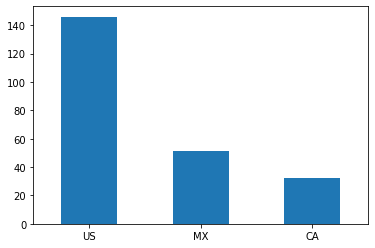

In [160]:
df_holiday_countrycount_chart = df_holiday_countrycount.plot.bar(rot=0)
#quick chart to show number of holidays in each country in 2020 - representing the data visually

Question #2 - How many holidays are observed on each day of the week in 2020? (Cumulative totals across Canada, MX & USA data)

Monday       45

Friday       42

Sunday       41

Saturday     29

Wednesday    25

Tuesday      24

Thursday     23

(Total - 229)

In [166]:
df_holiday_daycount = df['weekday.observed.name'].value_counts()
df_holiday_daycount
# df into the 'weekday.observed.name' column, which contains the qualitative data of the day name that each holiday falls on  

Monday       45
Friday       42
Sunday       41
Saturday     29
Wednesday    25
Tuesday      24
Thursday     23
Name: weekday.observed.name, dtype: int64

Question #3 - How Many Public Holidays are in each country?

(Using Groupby)

Canada = 6 public holidays, MX = 9 public holidays, US = 10 public holidays

In [263]:
publicholidays = df_holiday.groupby('country').agg(np.sum)
publicholidays
#Groupby() shows that there is an underlying relationship between the 'country', 'public', 'weekday.date.numeric' and 'weekday.observed.numeric' columns
#Using groupby() also depicts the number of public holidays in each country, answer above and in code below, as when we pass the aggregation operation sum, it sums the grouped country data, per country

,public,weekday.date.numeric,weekday.observed.numeric
country,,,
CA,6,137,137
MX,9,193,193
US,10,602,601


<AxesSubplot:ylabel='public'>

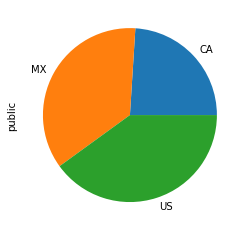

In [268]:
publicholidays_chart = publicholidays["public"]
publicholidays_chart.plot.pie(rot=0)
#a quick pie chart - to demonstrate the above public holiday data as a visual


In [199]:
df_CA_PublicHoliday = df_holiday.groupby('country').get_group('CA')
df_CA_PublicHoliday = df_CA_PublicHoliday.sort_values(by='public' , ascending = False)
df_CA_PublicHoliday
#I am interested in seeing which Canadian holidays are public
#Shows all Canadian holidays, the top 6 holidays are true
#created new df df_CA_PublicHoliday, so I could pass multiple fx/parameters
#groupby() groups the data by country, then get_group() groups the data by only Canadian data
#then sort_values() allows me to sort by public and ascending, to show the number of public holidays, their names, and other attributes
#the public holidays in Canada are New Year's Day, Good Friday, Christmas Day, Labor Day, Canada Day, and Victoria Day 

,name,date,observed,public,country,uuid,weekday.date.name,weekday.date.numeric,weekday.observed.name,weekday.observed.numeric
3,New Year's Day,2020-01-01,2020-01-01,True,CA,1f9bc6e3-b71c-44cb-a62d-6453db68ec50,Wednesday,3,Wednesday,3
54,Good Friday,2020-04-10,2020-04-10,True,CA,8636ec66-c5b6-48f0-af66-dd8fd03f7926,Friday,5,Friday,5
218,Christmas Day,2020-12-25,2020-12-25,True,CA,647968bc-9bd4-45fe-a255-35f485d8bcb7,Friday,5,Friday,5
136,Labor Day,2020-09-07,2020-09-07,True,CA,4ee5fd06-ee75-43f6-97ce-843de9bafb68,Monday,1,Monday,1
120,Canada Day,2020-07-01,2020-07-01,True,CA,780dedc5-4d4b-4474-8ac6-9b09c03c398f,Wednesday,3,Wednesday,3
94,Victoria Day,2020-05-18,2020-05-18,True,CA,5e620994-eb69-42e8-82dd-367c47d2dbaa,Monday,1,Monday,1
34,Commonwealth Day,2020-03-09,2020-03-09,False,CA,7454d151-e926-4891-9667-e7d9261a974a,Monday,1,Monday,1
37,Saint Patrick's Day,2020-03-17,2020-03-17,False,CA,9b5f630b-dd13-458d-ba97-2f0c948102ef,Tuesday,2,Tuesday,2
16,Groundhog Day,2020-02-02,2020-02-02,False,CA,b2fbe511-cc72-4c48-befc-df6f98a82724,Sunday,7,Sunday,7
215,Christmas Eve,2020-12-24,2020-12-24,False,CA,d89aca77-b6b8-43d4-adee-6ec607f23c88,Thursday,4,Thursday,4


In [209]:
df_MX_PublicHoliday = df_holiday.groupby('country').get_group('MX')
df_MX_PublicHoliday = df_MX_PublicHoliday.sort_values(by='public' , ascending = False)
df_MX_PublicHoliday
#same procedure as above with groupby() and get_group() for Mexico
#public holidays are New Years Day, Benito Juarez's Birthday, Revolution Day, Labor Day, Good Frida, Maundy Thursday, Independence Day, Christmas Day and Constitution Day

,name,date,observed,public,country,uuid,weekday.date.name,weekday.date.numeric,weekday.observed.name,weekday.observed.numeric
0,New Year's Day,2020-01-01,2020-01-01,True,MX,cee56502-97a2-461b-a491-e82c145f6358,Wednesday,3,Wednesday,3
35,Benito Juárez's birthday,2020-03-16,2020-03-16,True,MX,9d341c04-40e8-455e-a524-7eb3480f30d7,Monday,1,Monday,1
177,Revolution Day,2020-11-16,2020-11-16,True,MX,75fd441c-f41e-47c2-85e5-9d3a8e978420,Monday,1,Monday,1
74,Labor Day,2020-05-01,2020-05-01,True,MX,804493b7-263e-4d45-8a0d-88cf7b82fd70,Friday,5,Friday,5
52,Good Friday,2020-04-10,2020-04-10,True,MX,14e72b49-ae67-4be1-8e2f-6af4ae0ae7b2,Friday,5,Friday,5
49,Maundy Thursday,2020-04-09,2020-04-09,True,MX,d681d95f-dba7-4905-a7e4-426c1abedd58,Thursday,4,Thursday,4
143,Independence Day,2020-09-16,2020-09-16,True,MX,77497b72-1546-48d1-8c1c-b2914baf0f8d,Wednesday,3,Wednesday,3
216,Christmas Day,2020-12-25,2020-12-25,True,MX,c6baee3d-75b3-4a53-97b4-5610daa39e01,Friday,5,Friday,5
17,Constitution Day,2020-02-03,2020-02-03,True,MX,36c72dc9-1fb1-4e7f-b72b-0570e40f2cf1,Monday,1,Monday,1
212,Christmas Eve,2020-12-24,2020-12-24,False,MX,ee97da32-9b7a-438e-bb57-0e4b9b825b46,Thursday,4,Thursday,4


Question #4 - (Central Tendency) Which dates have the most amount of holidays? 


In [254]:
Date_Mode = df_holiday['date']
Date_Mode = Date_Mode.mode()
Date_Mode
#It is difficult to ask central tendency questions on a dataset that is largely qualitative, the only quantitative values I have are the dates and the weekday date.
#Navigated to 'date' column and applied built in Pandas Mode function to find most often occuring dates
#All of the below dates were most often occuring as holidays in 2020 in Canada, Mexico & the USA - each of these dates occurred 4 times in the dataset

0    2020-01-01
1    2020-06-20
2    2020-11-01
3    2020-12-17
4    2020-12-21
5    2020-12-24
6    2020-12-31
dtype: object

Question #5 - (Central Tendency) On which day of the week did the most holidays occur on?

In [255]:
Weekday_Mode = df_holiday['weekday.date.name']
Weekday_Mode = Weekday_Mode.mode()
Weekday_Mode
#This was already answered in a different way in question #2, via the valuecounts() function, where I asked how many holidays occurred on each weekday\
#This code specifically answers on which day of the week the most holidays occurred on in 2020, between the countries of Mexico, USA and Canada
#The answer is Monday

0    Monday
dtype: object

In [261]:
Weekdaynum_Mode = df_holiday['weekday.date.numeric']
Weekdaynum_Mode = Weekdaynum_Mode.mode()
Weekdaynum_Mode
#as there weren't many different central tendency measures I could work with for this data set, I decided to cross reference the accuracy of question #5 with another block of code
#The 'weekday.date.numeric' and 'weekday.date.name' are directly related, ie: Monday = 1, name to date. 
#In this code we examine the 'weekday.date.numeric' column, which holds quantitative data, numbers corresponding to the date of the week
#This code further confirms the accuracy of the above block of code, as the most often occuring number in the 'weekday.date.numeric' column is 1, signifying Monday is the most often occuring date for holidays.


0    1
dtype: int64